In [1]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

In [2]:
print("##문서 길이 : ",len(documents))
print("##문서 토픽 구성:\n",dataset.target_names)
print("##첫번째 문서 내용\n", documents[0])


##문서 길이 :  11314
##문서 토픽 구성:
 ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
##첫번째 문서 내용
 Well i'm not sure about the story nad it did seem biased. What
I disagree with is your statement that the U.S. Media is out to
ruin Israels reputation. That is rediculous. The U.S. media is
the most pro-israeli media in the world. Having lived in Europe
I realize that incidences such as the one described in the
letter have occured. The U.S. media as a whole seem to try to
ignore them. The U.S. is subsidizing Israels existance and the
Europeans are not (at least not to the same degree). So I think
that might be a reason they report more clearly on the
atroci

### **1-2. Data Frame**

In [3]:
import pandas as pd

article_df=pd.DataFrame({"article":documents})
article_df.head()

,article
0,Well i'm not sure about the story nad it did s...
1,"\n\n\n\n\n\n\nYeah, do you expect people to re..."
2,Although I realize that principle is not one o...
3,Notwithstanding all the legitimate fuss about ...
4,"Well, I will have to change the scoring on my ..."


### **1-3.Explore data**

In [4]:
print("##total number of article##\n")
article_df["article"].shape[0]

##total number of article##



11314

In [5]:
print("##unique txt##\n")
article_df["article"].unique()

##unique txt##



array(["Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n",
       "\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a

In [6]:
article_df.replace("",float("NaN"),inplace=True)
article_df.isnull().any()

article    True
dtype: bool

In [7]:

article_df.dropna(inplace=True)
print("##total number of article after drop NaN##\n")
article_df["article"].shape[0]

##total number of article after drop NaN##



11096

In [8]:

# 특수 문자 제거
article_df['clean_article'] = article_df['article'].str.replace("[^a-zA-Z]", " ")
# 길이가 3이하인 단어는 제거 (길이가 짧은 단어 제거)
article_df['clean_article'] = article_df['clean_article'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# 전체 단어에 대한 소문자 변환
article_df['clean_article'] = article_df['clean_article'].apply(lambda x: x.lower())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
#article_df.head()

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english') # NLTK로부터 불용어를 받아옵니다.
tokenized_article = article_df['clean_article'].apply(lambda x: x.split()) # 토큰화
tokenized_article = tokenized_article.apply(lambda x: [item for item in x if item not in stop_words])

In [12]:
tokenized_article

0        [well, sure, story, seem, biased, disagree, st...
1        [yeah, expect, people, read, actually, accept,...
2        [although, realize, principle, strongest, poin...
3        [notwithstanding, legitimate, fuss, proposal, ...
4        [well, change, scoring, playoff, pool, unfortu...
                               ...                        
11309    [danny, rubenstein, israeli, journalist, speak...
11310                                                   []
11311    [agree, home, runs, clemens, always, memorable...
11312    [used, deskjet, orange, micros, grappler, syst...
11313    [argument, murphy, scared, hell, came, last, y...
Name: clean_article, Length: 11096, dtype: object

In [13]:
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_article)
corpus = [dictionary.doc2bow(text) for text in tokenized_article]
print(corpus[1]) # 수행된 결과에서 두번째 뉴스 출력. 첫번째 문서의 인덱스는 0

[(52, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 2), (67, 1), (68, 1), (69, 1), (70, 1), (71, 2), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 2), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 2), (86, 1), (87, 1), (88, 1), (89, 1)]


In [14]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

min_topics,max_topics=20,25
coherence_scores=[]

for num_topics in range(min_topics,max_topics):
  model=LdaModel(corpus, num_topics=num_topics,id2word=dictionary)
  coherence=CoherenceModel(model=model, texts=tokenized_article, dictionary=dictionary)
  coherence_scores.append(coherence.get_coherence())

print(coherence_scores)

[0.4413434183495511, 0.43690560842025966, 0.49773545905915634, 0.496274072007277, 0.49625037946794626]


Text(0, 0.5, 'Coherence Scores')

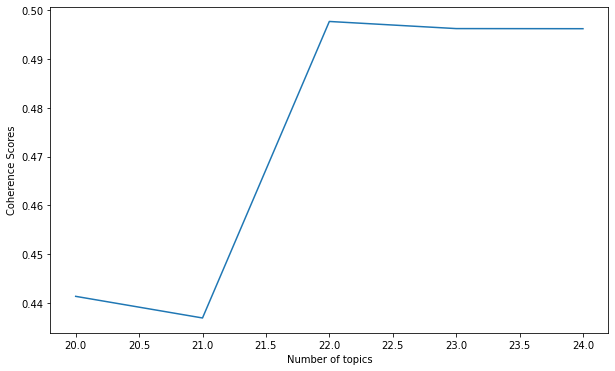

In [15]:
import matplotlib.pyplot as plt

x=[int(i) for i in range(min_topics,max_topics)]
plt.figure(figsize=(10,6))
plt.plot(x,coherence_scores)
plt.xlabel("Number of topics")
plt.ylabel("Coherence Scores")
#24가 제일 작음

In [16]:
LDA=LdaModel(corpus, num_topics=20,id2word=dictionary)
topics=LDA.print_topics()

In [17]:
for topic in topics:
    print(topic)

(0, '0.013*"drive" + 0.011*"disk" + 0.009*"card" + 0.008*"system" + 0.007*"software" + 0.007*"windows" + 0.006*"apple" + 0.006*"memory" + 0.006*"tape" + 0.005*"computer"')
(1, '0.015*"space" + 0.007*"would" + 0.006*"nasa" + 0.005*"information" + 0.004*"research" + 0.004*"also" + 0.004*"april" + 0.003*"data" + 0.003*"like" + 0.003*"email"')
(2, '0.010*"entries" + 0.009*"window" + 0.007*"motif" + 0.005*"subject" + 0.005*"based" + 0.003*"visual" + 0.003*"widget" + 0.003*"system" + 0.003*"also" + 0.003*"widgets"')
(3, '0.013*"jesus" + 0.007*"bible" + 0.007*"char" + 0.006*"would" + 0.004*"christ" + 0.004*"time" + 0.004*"judas" + 0.004*"believe" + 0.004*"church" + 0.004*"john"')
(4, '0.006*"government" + 0.005*"would" + 0.004*"encryption" + 0.004*"administration" + 0.004*"people" + 0.004*"technology" + 0.004*"also" + 0.003*"medical" + 0.003*"well" + 0.003*"health"')
(5, '0.005*"sharks" + 0.003*"vernon" + 0.003*"wings" + 0.003*"jets" + 0.003*"digit" + 0.003*"potvin" + 0.003*"flames" + 0.003*"

In [18]:
!pip install pyLDAvis

In [19]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
LDA = pyLDAvis.gensim_models.prepare(LDA, corpus, dictionary)
pyLDAvis.display(LDA)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
